# **Checkpoint 01 - Modelagem de Dados e Aprendizagem de Máquina**

## **Objetivo**
Avaliar conceitos sobre Modelagem de dados e Aprendizado de Máquina (ML) adquiridos no curso.

## **Descrição do Desafio**
Você foi contratado por uma empresa que desenvolveu uma plataforma de compra e venda de carros usados. O funcionamento é bem simples, os usuários cadastram o carro que querem vender e esperam que outro usuário os compre, a empresa então fica com uma parte do valor de venda. Seu papel é desenvolver um modelo que possa determinar qual o melhor preço de venda para um usado.

Para nortear o desenvolvimento, você precisa de um ponto de partida e determinou uma pergunta chave: **Qual o preço de venda de um veículo Volkswagen Sedan 2.0 a gasolina, ano 2005, com cerca de 172095 km rodados?**

### **Orientações**
Para responder a essa pergunta, você deve utilizar o dataset da empresa, que está representado no arquivo **carros.csv**, e seguir o roteiro proposto neste desafio.

## **Exploração de Dados - 2 pontos**

1 - Carregue o dataset e faça a inspeção nas 15 primeiras linhas para identificação dos atributos. Quantos dados existem nesse dataset? Qual a quantidade de atributos? Existem valores faltantes? De que tipo são os dados? (1,0)

**Link do vídeo!!!!!     ->**    https://tinyurl.com/2k8ptdu5

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt


In [50]:
import pandas as pd

df = pd.get_dummies(df)

df = pd.read_csv('/content/carros.csv')

#Quantidade de dados
print(f'Quantidade de dados: \n {len(df)}')

print()

#Quantidade de atributos
print(f'Quantidade de atributos: \n {df.shape[1]}')

print()

#Valores faltantes
print(f'Dados faltantes: \n {df.isnull().sum().sum()}')
df = df.dropna()

print()

#Tipo dos dados
tipo_de_dados = [str(dtype) for dtype in df.dtypes.unique()]
print(f'Tipo dos dados: \n {tipo_de_dados}')

df.head(15)

Quantidade de dados: 
 4345

Quantidade de atributos: 
 9

Dados faltantes: 
 322

Tipo dos dados: 
 ['object', 'float64', 'int64']


,Brand,Price,Body,Mileage/1000,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.00,Petrol,yes,2011,Rav 4
5,Mercedes-Benz,199999.0,crossover,0,5.50,Petrol,yes,2016,GLS 63
6,BMW,6100.0,sedan,438,2.00,Gas,yes,1997,320
7,Audi,14200.0,vagon,200,2.70,Diesel,yes,2006,A6
8,Renault,10799.0,vagon,193,1.50,Diesel,yes,2012,Megane
9,Volkswagen,1400.0,other,212,1.80,Gas,no,1999,Golf IV


2 - Note que os dataset está no sistema americano. Converta os dados para o sistema métrico e altere o cabeçalho de forma que os dados façam sentido. (1,0)

Obs: Os dados de Milhas dividos por mil, ou seja, multiplique o valor por 1.000 para ter o valor real!

In [51]:
#Alterando o nome das colunas
df.rename(columns={"Mileage/1000": "Km", "Brand": "Marca", "Price": "Preço", "EngineV": "Motor", "Engine Type": "Combustível", "Registration": "Cadastro",
                   "Year": "Ano", "Model": "Modelo", "Body": "Tipo"}, inplace=True)

#Multiplicando o valor por 1000
df['Km'] = df['Km'].apply(lambda x: x * 1000)

df.head(5)



,Marca,Preço,Tipo,Km,Motor,Combustível,Cadastro,Ano,Modelo
0,BMW,4200.0,sedan,277000,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427000,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358000,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240000,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120000,2.0,Petrol,yes,2011,Rav 4


## **Analise descritiva dos dados - 2 pontos**

3 - Faça uma análise exploratória dos dados, utilizando gráficos e tabelas para realizar correlações entre os atributos e que permitam criar um cenário de correlação entre eles.

In [ ]:
!pip3 install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<Axes: >

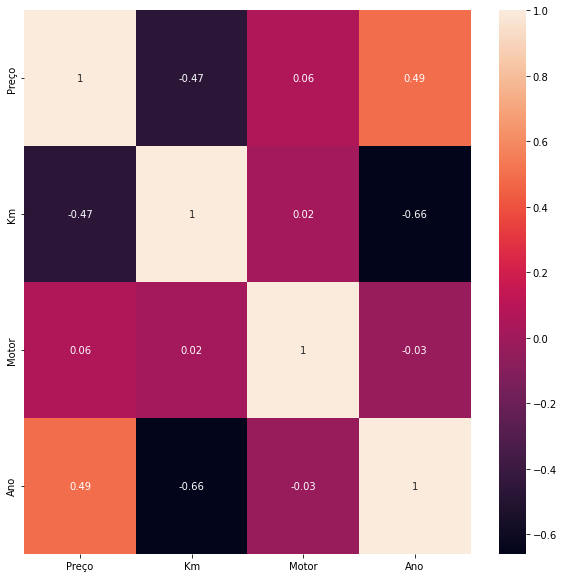

In [52]:
import seaborn as sns
correlation = df.corr().round(2)
correlation
plt.figure(figsize=[10,10])
sns.heatmap(correlation, annot=True)   

# É Perceptível que o ano e a quantidade de Km's rodados nfluenciam muito no preço do carro. 

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Preço', ylabel='Ano'>

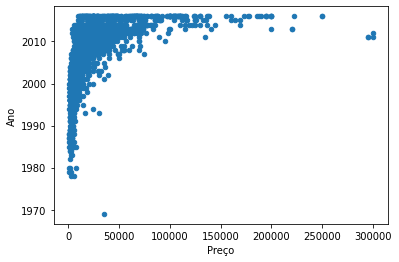

In [53]:
#Correlação entre Preço e Ano

df.plot.scatter('Preço', 'Ano')

<Axes: xlabel='Preço', ylabel='Km'>

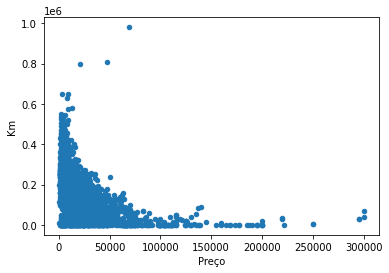

In [54]:
#Correlação entre Preço e Km
df.plot.scatter('Preço', "Km")

## **Desenvolvimento do Modelo - 2 pontos**

4 - O conjunto de dados indica a aplicação de qual modelo de aprendizagem de máquina para responder a pergunta do desafio? Por quê? (1,0)

**Resposta:** Aprendizado supervisionado. 
**Por que?**
Pois a entrada e saída dos dados inseridos são definidas, portanto possuem respostas esperadas, fazendo com que o algoritmo compare as repostas, tratando os erros quando preciso(acompanhamento e indução ao acerto). E no supervisionado existe a divisão de dados para treino também, enquanto no não supervisionado é somente teste.


5 - Qual a técnica sugerida para este projeto? Por quê? (1,0)



**Resposta:** Supervisionado, porque o objetivo do cliente é vender seu carro, portanto, é preciso que o percentual para sua venda seja o melhor possível para realizar a venda. Além disso o modelo ja possuem dados definidos para a predição.

Com base nas suas respostas, agora escolha dois algortimos para implementar e comparar a performance de cada um deles ao final do desafio.

**Resposta:**

**Algoritmo 1:** LinearRegression

**Algoritmo 2:** KNN

## **Treinamento e teste do Modelo - 3 pontos**

6 - Crie um subset dos dados que serão utilizados para o treinamento e para o teste do modelo. Divida este subset em treino e teste. (1,0) 

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4025 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Marca        4025 non-null   object 
 1   Preço        4025 non-null   float64
 2   Tipo         4025 non-null   object 
 3   Km           4025 non-null   int64  
 4   Motor        4025 non-null   float64
 5   Combustível  4025 non-null   object 
 6   Cadastro     4025 non-null   object 
 7   Ano          4025 non-null   int64  
 8   Modelo       4025 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 314.5+ KB


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df = pd.get_dummies(df)

X = df.drop(columns = ['Ano'], axis=1)
y = df['Preço']
X_treino,X_teste,y_treino,y_teste=train_test_split(X,y,test_size=0.2,random_state=42)

X_treino.head()
print()
X_teste.head()

,Preço,Km,Motor,Marca_Audi,Marca_BMW,Marca_Mercedes-Benz,Marca_Mitsubishi,Marca_Renault,Marca_Toyota,Marca_Volkswagen,...,Modelo_Vito,Modelo_X1,Modelo_X3,Modelo_X5,Modelo_X5 M,Modelo_X6,Modelo_X6 M,Modelo_Yaris,Modelo_Z3,Modelo_Z4
1862,23000.0,80000,2.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1295,8900.0,96000,2.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2946,14300.0,175000,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2093,8300.0,137000,1.5,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1318,8500.0,220000,2.5,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


7 - Faça o treinamento e teste dos 2 algoritmos escolhidos. Utilize uma métrica (ex. R2-score, RMSE e MAE...) para avaliar a performance dos modelos.

7.1 - Algoritmo 1: (0,5)


In [69]:
#LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
import numpy as np

df = pd.get_dummies(df)

lreg = LinearRegression()
lreg.fit(X_treino,y_treino)
y_pred = lreg.predict(X_teste)

print('R2-score: %.2f' % r2_score(y_pred , y_teste) )
print('SSE(Soma dos Erros ao Quadrado): %.2f' % np.sum((y_pred - y_teste)**2))
print('MSE(Erro Quadrático Médio): %.2f' % mean_squared_error(y_teste, y_pred))
print('MAE(Erro Médio Absoluto): %.2f' % mean_absolute_error(y_teste, y_pred))
print ('RMSE(Raiz do Erro Quadrático Médio): %.2f ' % np.sqrt(mean_squared_error(y_teste, y_pred)))


R2-score: 1.00
SSE(Soma dos Erros ao Quadrado): 0.00
MSE(Erro Quadrático Médio): 0.00
MAE(Erro Médio Absoluto): 0.00
RMSE(Raiz do Erro Quadrático Médio): 0.00 


7.2 - Algoritmo 2:  (0,5)

In [70]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

k = 3

modelK = KNeighborsClassifier(n_neighbors=k)

modelK.fit(X_treino, y_treino)

ValueError: ignored

In [90]:
# AVALIANDO MODELO**
# KNN
y_pred = lreg.predict(X_teste)
mse = mean_squared_error(y_teste, y_pred)
mae = mean_absolute_error(y_teste, y_pred)
r2 = r2_score(y_teste, y_pred)
print('Erro médio quadrático: ', mse)
print('Erro médio absoluto:', mae)
print('Coeficiente de determinação: ', r2)

Erro médio quadrático: %.2f 7.419953906532685e-14
Erro médio absoluto: %.2f 3.1860438849768304e-08
Coeficiente de determinação: %.2f 1.0


7.3 - Qual dos algortimos obteve melhor resultado? Por quê? (1,0)

**Resposta:** O modelo de Regressão Linear, pois com ele foi possível obter um aproveitamento muito bom da predição, com menos erros do que com KNN


## **Modelo de Produção: Teste com novos dados - 1 ponto**

8 - Use o seu modelo treinado para responder a pergunta do desafio:

In [88]:
np.random.seed(42)

pred = lreg([[2005, 172095, 2.0, 6, 1]])
print(f'Preço previsto:', {pred})


TypeError: ignored